# REGRESIÓN LOGISTICA

In [2]:
import pymysql
import pandas as pd

try:
    conn = pymysql.connect(
        host='127.0.0.1',
        port=3306,
        user='root',
        password='Grace07431*',
        database='accidentes_electricos',
        connect_timeout=5
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM accidentes_de_origen_electrico")
    resultados = cursor.fetchall()

    # Obtener los nombres de las columnas
    column_names = [column[0] for column in cursor.description]

    # Crear un DataFrame de Pandas
    df = pd.DataFrame(resultados, columns=column_names)

    # Imprimir el DataFrame (se muestra como una tabla)
    print(df)

except pymysql.MySQLError as e:
    print(f"❌ Error: {e}")

finally:
    if cursor:
        cursor.close()
    if conn:
        conn.close()

     IDENTIFICADOR_EMPRESA                                            EMPRESA  \
0                    617.0      EMPRESAS MUNICIPALES DE CARTAGO S.A.S. E.S.P.   
1                    617.0      EMPRESAS MUNICIPALES DE CARTAGO S.A.S. E.S.P.   
2                   3370.0              EMPRESA DE ENERGIA DE CASANARE SA ESP   
3                  23442.0    COMPAÑIA ENERGETICA DE OCCIDENTE S.A.S.  E.S.P.   
4                    617.0      EMPRESAS MUNICIPALES DE CARTAGO S.A.S. E.S.P.   
..                     ...                                                ...   
520                  523.0         EMPRESA DE ENERGIA DEL  QUINDIO S.A.E.S.P.   
521                  500.0  EMPRESA DE ENERGIA DE BOYACA S.A. E.S.P. EMPRE...   
522                 2249.0             ELECTRIFICADORA DEL CARIBE S.A. E.S.P.   
523                  520.0         CENTRALES ELECTRICAS DE NARIÑO S.A. E.S.P.   
524                  564.0               EMPRESAS PÚBLICAS DE MEDELLIN E.S.P.   

          FECHA  ANIO  TRIM

# codificación de variables

Como las variables (ORIGEN_ACCIDENTE, UBICACION, CAUSA_ACCIDENTE,) son categóricas (texto), necesitamos convertirlas a números usando pd.get_dummies() para que el modelo pueda entenderlas.

In [6]:
# Seleccionar solo las columnas necesarias
df_modelo = df[['ORIGEN_ACCIDENTE', 'UBICACION', 'CAUSA_ACCIDENTE', ]].dropna()

# Variables predictoras (X) y objetivo (y)
X = pd.get_dummies(df_modelo[['ORIGEN_ACCIDENTE', 'UBICACION', ]], drop_first=True)
y = df_modelo['CAUSA_ACCIDENTE']

# Verificamos cómo quedaron las variables
print("Variables X (predictoras):")
print(X.head())

print("\nVariable y (objetivo):")
print(y.value_counts())


Variables X (predictoras):
   ORIGEN_ACCIDENTE_Apertura interruptores con carga  \
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   

   ORIGEN_ACCIDENTE_Apertura o cierre de seccionadores  \
0                                              False     
1                                              False     
2                                              False     
3                                              False     
4                                              False     

   ORIGEN_ACCIDENTE_Cortocircuito  \
0                           False   
1                           False   
2                           False   
3                           False   
4                           False   

   ORIGEN_ACCIDENTE_Desatención de normas técnicas  \
0         

# Dividir los datos en entrenamiento y prueba

In [7]:
from sklearn.model_selection import train_test_split

# Dividir datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (420, 25)
Tamaño del conjunto de prueba: (105, 25)


# Entrenar el modelo de Regresión Logística

In [8]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo
modelo = LogisticRegression(max_iter=1000)

# Entrenar el modelo
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Evaluar el modelo

In [9]:
from sklearn.metrics import accuracy_score, classification_report

# Hacer predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluar la precisión
print("Precisión del modelo:", accuracy_score(y_test, y_pred))

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.44761904761904764

Reporte de clasificación:
                    precision    recall  f1-score   support

  Arcod Eléctricos       0.27      0.11      0.15        28
  Contacto Directo       0.41      0.67      0.51        36
Contacto Indirecto       0.00      0.00      0.00        12
     CortoCircuito       0.36      0.80      0.50         5
 Equipo defectuoso       0.00      0.00      0.00         1
              Otra       0.67      0.78      0.72        18
             Rayos       1.00      0.67      0.80         3
        Sobrecarga       0.00      0.00      0.00         1
  Tensión Contacto       0.00      0.00      0.00         1

          accuracy                           0.45       105
         macro avg       0.30      0.34      0.30       105
      weighted avg       0.37      0.45      0.38       105



c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

# ver la matriz de confusión

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


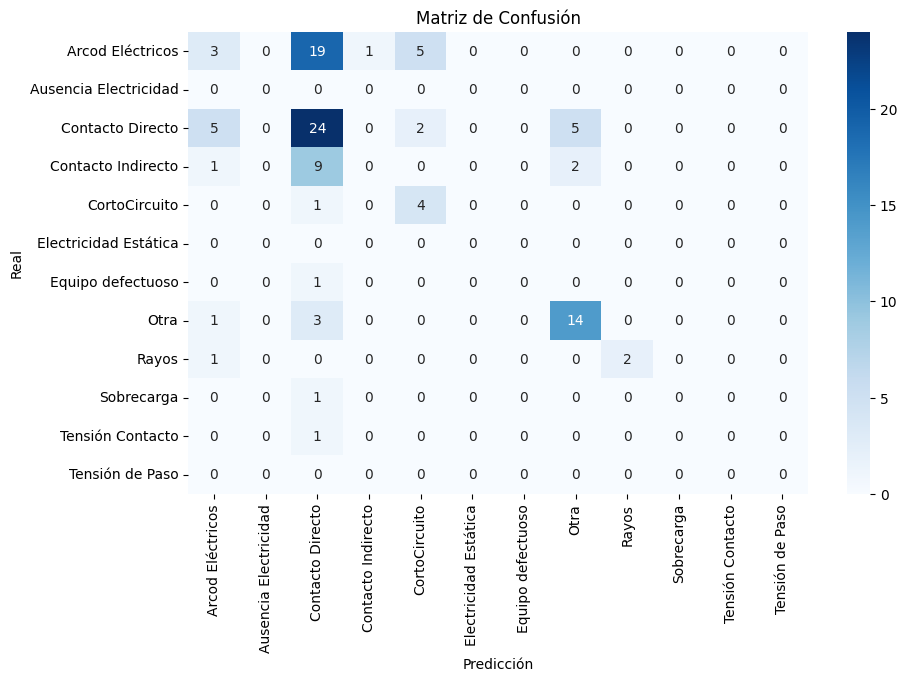

In [12]:
!pip install seaborn

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=modelo.classes_)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=modelo.classes_, yticklabels=modelo.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

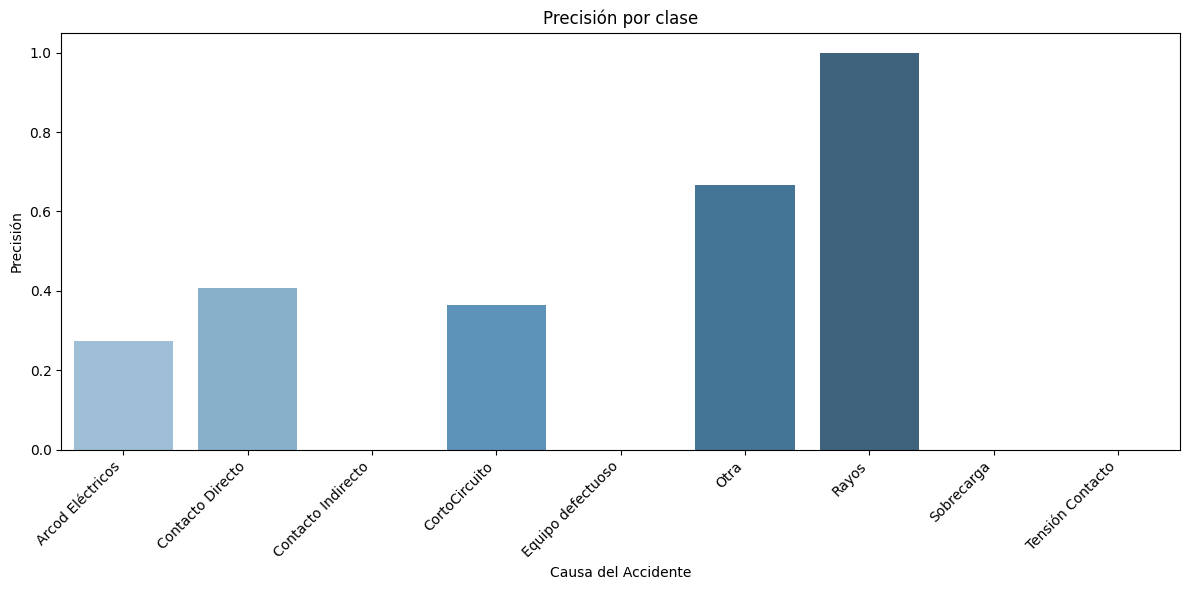

In [13]:
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generar el reporte como diccionario
reporte = classification_report(y_test, y_pred, output_dict=True)

# Convertir a DataFrame para poder graficar
df_reporte = pd.DataFrame(reporte).transpose()

# Filtrar solo las clases (excluyendo accuracy, macro avg, weighted avg)
df_clases = df_reporte.iloc[:-3][['precision', 'recall', 'f1-score']]

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=df_clases, x=df_clases.index, y='precision', palette='Blues_d')
plt.xticks(rotation=45, ha='right')
plt.title('Precisión por clase')
plt.ylabel('Precisión')
plt.xlabel('Causa del Accidente')
plt.tight_layout()
plt.show()
